Attempting to predict the future price of Ethereum

In [3]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
#Load data
from google.colab import files
files.upload()

Saving ETHUSD1440.csv to ETHUSD1440.csv


{'ETHUSD1440.csv': b'Date,Time,Open,High,Low,Close,Volume\r\n2021.01.04,0:00,944.91,1163.58,880.09,1006.86,480722\r\n2021.01.05,0:00,1003.46,1133.03,971.83,1082.98,355390\r\n2021.01.06,0:00,1090.78,1212.51,1057.33,1181.55,374656\r\n2021.01.07,0:00,1185.06,1290.47,1142.87,1252.95,364024\r\n2021.01.08,0:00,1247.26,1275.08,1060.23,1182.57,324078\r\n2021.01.11,0:00,1269.24,1288.29,906.2,1030.24,339866\r\n2021.01.12,0:00,1023.29,1150.45,1005.38,1076.28,310328\r\n2021.01.13,0:00,1081.15,1126.26,983.5,1124.56,258546\r\n2021.01.14,0:00,1128.11,1245.62,1084.62,1184.8,292618\r\n2021.01.15,0:00,1183.8,1254.26,1064.12,1158.04,330974\r\n2021.01.18,0:00,1267.94,1267.94,1180.98,1233.36,241461\r\n2021.01.19,0:00,1229.64,1438.77,1229.64,1408.97,299312\r\n2021.01.20,0:00,1416.42,1423.79,1232.99,1322.63,325630\r\n2021.01.21,0:00,1323.58,1389.43,1159.99,1167.78,327361\r\n2021.01.22,0:00,1158.38,1231.71,1036.75,1229.55,242243\r\n2021.01.25,0:00,1419.85,1444.06,1310.25,1345.08,202547\r\n2021.01.26,0:00,1330

In [6]:
#Read the data
df=pd.read_csv('ETHUSD1440.csv')
#Set the date as index
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
#Show the data
df

,Date,Time,Open,High,Low,Close,Volume
2021-01-04,2021.01.04,0:00,944.91,1163.58,880.09,1006.86,480722
2021-01-05,2021.01.05,0:00,1003.46,1133.03,971.83,1082.98,355390
2021-01-06,2021.01.06,0:00,1090.78,1212.51,1057.33,1181.55,374656
2021-01-07,2021.01.07,0:00,1185.06,1290.47,1142.87,1252.95,364024
2021-01-08,2021.01.08,0:00,1247.26,1275.08,1060.23,1182.57,324078
...,...,...,...,...,...,...,...
2022-04-11,2022.04.11,0:00,3285.23,3285.52,2964.88,2989.06,318180
2022-04-12,2022.04.12,0:00,2993.19,3082.21,2941.12,2983.68,342703
2022-04-13,2022.04.13,0:00,2990.24,3114.06,2981.66,3101.55,316061
2022-04-14,2022.04.14,0:00,3095.88,3140.68,2971.29,3009.74,323802


In [7]:
future_days=5 #5 Day price forecast

In [8]:
#Create new column that contains future price
df[str(future_days)+'_Day_Price_Forecast']=df[['Close']].shift(-future_days)
#Show the data
df[['Close', str(future_days)+'_Day_Price_Forecast']]

,Close,5_Day_Price_Forecast
2021-01-04,1006.86,1030.24
2021-01-05,1082.98,1076.28
2021-01-06,1181.55,1124.56
2021-01-07,1252.95,1184.80
2021-01-08,1182.57,1158.04
...,...,...
2022-04-11,2989.06,NaN
2022-04-12,2983.68,NaN
2022-04-13,3101.55,NaN
2022-04-14,3009.74,NaN


In [9]:
#Independent dataset
X=np.array(df[['Close']])
X=X[:df.shape[0]-future_days]#Remove last 5 days of data
print(X)

[[1006.86]
 [1082.98]
 [1181.55]
 [1252.95]
 [1182.57]
 [1030.24]
 [1076.28]
 [1124.56]
 [1184.8 ]
 [1158.04]
 [1233.36]
 [1408.97]
 [1322.63]
 [1167.78]
 [1229.55]
 [1345.08]
 [1333.19]
 [1274.29]
 [1349.47]
 [1372.49]
 [1349.2 ]
 [1518.16]
 [1632.29]
 [1640.33]
 [1719.43]
 [1696.51]
 [1768.42]
 [1726.34]
 [1767.41]
 [1857.61]
 [1785.19]
 [1752.65]
 [1854.85]
 [1945.2 ]
 [1956.55]
 [1799.  ]
 [1528.  ]
 [1588.44]
 [1521.07]
 [1441.65]
 [1545.27]
 [1560.51]
 [1516.03]
 [1535.23]
 [1790.  ]
 [1824.23]
 [1814.6 ]
 [1838.54]
 [1754.4 ]
 [1791.48]
 [1796.69]
 [1813.92]
 [1771.14]
 [1815.51]
 [1675.61]
 [1670.5 ]
 [1608.76]
 [1602.32]
 [1666.6 ]
 [1806.17]
 [1840.56]
 [1939.44]
 [1969.41]
 [2088.29]
 [2103.44]
 [2120.19]
 [1982.72]
 [2053.29]
 [2068.8 ]
 [2144.17]
 [2301.11]
 [2367.74]
 [2499.91]
 [2457.28]
 [2207.03]
 [2305.99]
 [2402.26]
 [2386.36]
 [2321.92]
 [2457.17]
 [2646.43]
 [2705.2 ]
 [2706.96]
 [2759.66]
 [3284.07]
 [3396.67]
 [3455.28]
 [3465.55]
 [3496.06]
 [4113.73]
 [4136.8 ]

In [10]:
y=np.array(df[str(future_days)+'_Day_Price_Forecast'])
y=y[:-future_days]
print(y)

[1030.24 1076.28 1124.56 1184.8  1158.04 1233.36 1408.97 1322.63 1167.78
 1229.55 1345.08 1333.19 1274.29 1349.47 1372.49 1349.2  1518.16 1632.29
 1640.33 1719.43 1696.51 1768.42 1726.34 1767.41 1857.61 1785.19 1752.65
 1854.85 1945.2  1956.55 1799.   1528.   1588.44 1521.07 1441.65 1545.27
 1560.51 1516.03 1535.23 1790.   1824.23 1814.6  1838.54 1754.4  1791.48
 1796.69 1813.92 1771.14 1815.51 1675.61 1670.5  1608.76 1602.32 1666.6
 1806.17 1840.56 1939.44 1969.41 2088.29 2103.44 2120.19 1982.72 2053.29
 2068.8  2144.17 2301.11 2367.74 2499.91 2457.28 2207.03 2305.99 2402.26
 2386.36 2321.92 2457.17 2646.43 2705.2  2706.96 2759.66 3284.07 3396.67
 3455.28 3465.55 3496.06 4113.73 4136.8  4103.8  3713.9  3997.9  3434.3
 3437.6  2540.9  2761.9  2254.8  2610.2  2538.4  2786.8  2721.   2425.4
 2595.1  2560.6  2721.6  2817.6  2695.5  2668.1  2532.6  2559.9  2462.1
 2381.2  2540.8  2515.3  2399.1  2335.5  2186.2  1940.6  1922.9  1921.3
 1997.5  1862.8  2132.4  2188.6  2237.3  2112.7  2085.3 

In [11]:
#Split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [12]:
from sklearn.svm import SVR
svr_rbf=SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=1e-05)

In [13]:
svr_rbf_confidence=svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy:', svr_rbf_confidence)

svr_rbf accuracy: 0.8685983196474638


In [14]:
#Compare predicted values to actual values
svm_prediction= svr_rbf.predict(x_test)
print(svm_prediction)

[2330.64430397 3257.61287579 1290.71152496 1831.33517511 1607.16535679
 1809.80424603 3463.61278913 3025.22264589 2817.76625771 3996.81798091
 2339.01399522 1844.49499546 1599.51297707 4310.75868055 2649.09293414
 2725.20365134 4410.33053712 3541.17204569 2883.47717478 2111.33998382
 3235.81281318 2421.1595582  2709.48811672 3614.12971398 2900.60050916
 4411.61719977 1990.70812881 3555.49428695 2037.92180104 3552.91161583
 3566.59644914 4257.84422632 3762.49558617 3397.48847215 1829.77567078
 1813.49717742 3531.24688622 3112.87991775 3711.2238028  2745.01620197
 1810.75013809 4416.31080672 2896.02348658 3214.55024512 3046.85078397
 3093.91497778 3159.14714462 2074.9398652  2390.59700453 1906.55978962
 3672.77795831 3926.17235071 3830.88352097 1258.54120258 1849.98891946
 4163.63337235 2747.85094914 3092.12691248 3550.11365981 1885.27505385
 2191.55639377 1898.8259448  3152.16806202 1855.51517002 1295.62939979
 3320.75549473]


In [15]:
#take a look at the actual values
print(y_test)

[2457.17 3235.29 1124.56 1602.32 1696.51 1726.34 3370.3  2721.6  3396.67
 3437.6  2022.6  1675.61 1349.2  4006.6  2705.2  2515.3  4070.9  3752.2
 2381.2  2457.28 4113.73 2592.3  2386.36 4256.7  3465.55 4240.6  2294.9
 3020.7  2112.7  3423.89 4084.7  4772.9  3246.   2754.3  1752.65 1969.41
 3547.   3212.6  3971.3  2945.65 1754.4  4646.9  2769.62 3256.1  2599.42
 2891.32 3122.44 2410.8  2355.   2085.3  4020.69 4449.7  4403.5  1229.55
 1545.27 4508.7  2816.53 3438.9  2989.06 2120.19 1899.2  1588.44 3101.55
 2103.44 1167.78 2601.63]


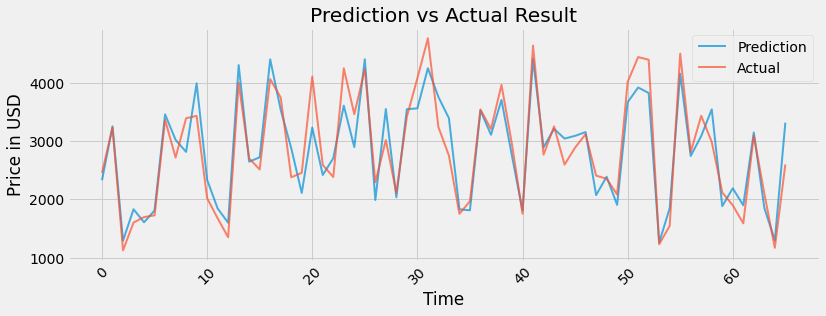

In [16]:
plt.figure(figsize=(12,4))
plt.plot(svm_prediction, label = 'Prediction', lw=2, alpha=.7)
plt.plot(y_test, label = 'Actual', lw=2, alpha=.7)
plt.title('Prediction vs Actual Result')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()